# Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [3]:
df = pd.read_csv('per_test.csv')
display(df)

test    dev  ant   SVType Freq  Track_name  Track  SV  num_slips  \
0        1  BX992    0      GPS   L1          CA      0  28          8   
1        1  BX992    0      GPS   L1          CA      0   3          9   
2        1  BX992    0      GPS   L1          CA      0  21         89   
3        1  BX992    0      GPS   L1          CA      0  25        287   
4        1  BX992    0      GPS   L1          CA      0   2         43   
...    ...    ...  ...      ...  ...         ...    ...  ..        ...   
6865     7  P4-05    1  Galileo   E6  BPSK(5)-PD     36  25          0   
6866     7  P4-05    1  Galileo   E6  BPSK(5)-PD     36   3          3   
6867     7  P4-05    1  Galileo   E6  BPSK(5)-PD     36  24          0   
6868     7  P4-05    1  Galileo   E6  BPSK(5)-PD     36   6          0   
6869     7  P4-05    1  Galileo   E6  BPSK(5)-PD     36   5          0   

      num_obs  
0        1240  
1        1240  
2        1240  
3        1148  
4        1240  
...       ...  
6865     7147  
6866     7033  
6867     7181  
6868      494  
6869     7181  

[6870 rows x 10 columns]

# Plots

FileNotFoundError: [Errno 2] No such file or directory: '/home/russ/Documents/_GNSS_data/2024/CSNMR-3388_LinkBelt_Cycle_Slips/240912/per_test_figs/1_0_BX992_num_slips.png'

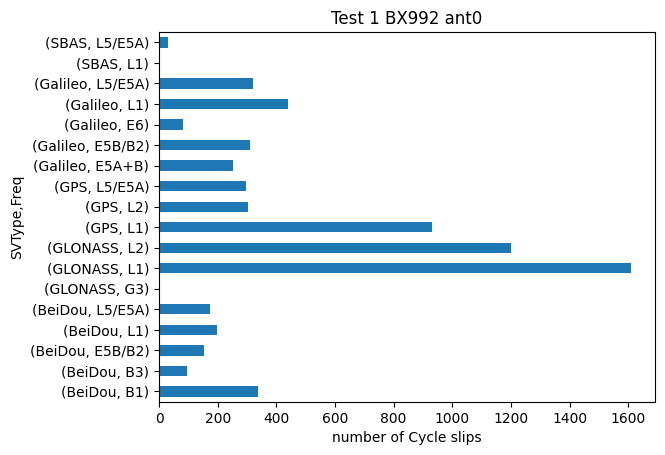

In [22]:
devs = ['BX992', 'EB1-5093', 'EB1-5095', 'P4-05']
for test in df.test.unique():
    for ant in [0, 1]:
        for dev in devs:
            dfq = df.query(f'test=={test} and ant=={ant} and dev=="{dev}"')
            if dfq.empty:
                continue
            dft = dfq[['SVType', 'Freq', 'num_slips', 'num_obs']]
            dfg = dft.groupby(['SVType', 'Freq'])['num_slips'].sum()

            fig = plt.figure()
            dfg.plot(kind='barh')
            plt.title(f'Test {test} {dev} ant{ant}')
            plt.xlabel('number of Cycle slips')

            png_fname = os.path.join('per_test_figs', f'{test}_{ant}_{dev}_num_slips.png')
            plt.savefig(png_fname)
            plt.close()